In [60]:
%matplotlib inline
import pandas as pd
import scipy.stats as st
import math
import matplotlib.pyplot as plt
import numpy as np

In [61]:
data = pd.read_csv("./haberman-data/haberman.csv")
n = len(data)

# Investigate Data Types

In [62]:
print "Column\tType"
for col in data:
    print col + "\t" + str(data[col].dtypes)

Column	Type
age	int64
year	int64
axillary_nodes	int64
survival_status	int64


# Look at the summary statistics for the data

In [63]:
data.describe()

,age,year,axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# Convert survival_status to a categorical variable

Status 1: the patient survived 5 years or longer

Status 2: the patient died within 5 years


In [64]:
data["survival_status"] = data["survival_status"].astype('category')

# Distribution of Variables

### What is the distribution of survival status?

1. 225 people in the sample survived 5 years or longer
2. 81 people died within 5 years

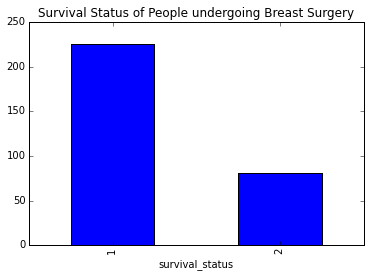

In [65]:
data.groupby('survival_status').size().plot(kind='bar', title='Survival Status of People undergoing Breast Surgery')
# data.survival_status.value_counts().plot(kind='bar')

### What is the distribution of Age?

Age is a symmetric single peaked distribution between [30, 83]

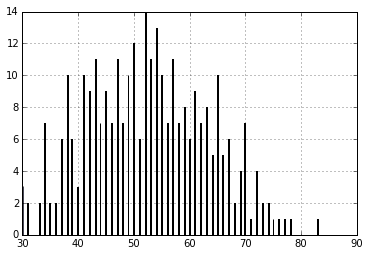

In [66]:
data["age"].hist(bins=306)

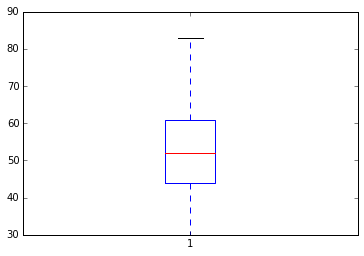

In [67]:
plot = plt.boxplot(data.age)

### What is the Distribution of the number of axillary nodes?

The distribution is positively skewed

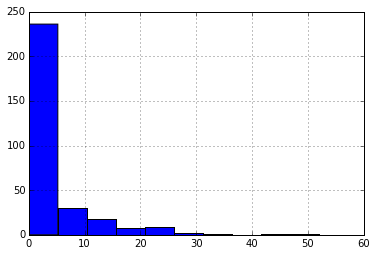

In [68]:
data["axillary_nodes"].hist()

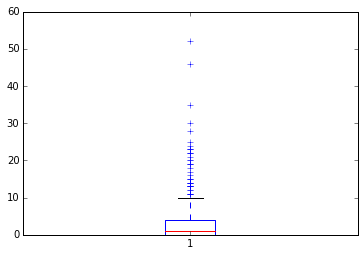

In [69]:
plot = plt.boxplot(data.axillary_nodes)

## Confidence Intervals

In [70]:
def t_confidence_interval(alpha, n, x_bar, s):
    t_critical = st.t.ppf(1-alpha/2,  n - 1 )
    std_error_mean = t_critical * s/math.sqrt(n)
    return map(lambda x: round(x,2), [x_bar - std_error_mean, x_bar + std_error_mean])

In [71]:
# We want a 95% confidence interval
alpha = 0.05

### What is the mean age of the population of people who have undergone breast surgery?

In [72]:
# 95% confidence interval for the mean population age
t_confidence_interval(alpha, n, data["age"].mean(), data["age"].std())

[51.24, 53.67]

### What is the mean number of axillary nodes in the population of people who have undergone breast surgery?

In [73]:
# 95% population interval for the mean number of axillary nodes
t_confidence_interval(alpha, n, data["axillary_nodes"].mean(), data["axillary_nodes"].std())

[3.22, 4.83]

# Relationships

## Is there a relationship between number of axillary nodes and age?

1. There doesn't seem to be a relationship
2. Correlation Coefficient: -0.06
3. p-value is 0.27 which is not statistically significant

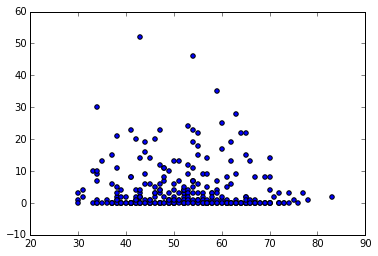

In [74]:
plt.scatter(data["age"], data["axillary_nodes"])

In [75]:
from scipy.stats.stats import pearsonr
pearsonr(data["age"], data["axillary_nodes"])

(-0.063176102389800648, 0.27058847128546198)

## Is there a relationship between age and survival status?

#### 1. Convert Age to an Ordinal Variable

In [76]:
age_bins = [25, 45, 65, 150]

In [77]:
data['age'] = pd.cut(data['age'], age_bins, 
    right=True, include_lowest=True)

#### 2. Age Contingency Table

In [78]:
pd.crosstab(index=data.age, columns="count", margins=True)

col_0,count,All
age,,
"[25, 45]",89,89
"(45, 65]",179,179
"(65, 150]",38,38
All,306,306


   #### 3. Age vs. Survival Status Contingecy Table 

In [79]:
contingency = pd.crosstab(index=data.age, columns=data.survival_status)
contingency

survival_status,1,2
age,,
"[25, 45]",70,19
"(45, 65]",128,51
"(65, 150]",27,11


#### 4. Conduct the chi-square test for independence

### Hypothesis

H0: The variables age and survival status are independent

H1: The variables age and survival status are not independent

Degrees of freedom = 2

In [80]:
chi_square = st.contingency.chi2_contingency(contingency)
print "Chi-Square Statistic", chi_square[0]
print "P-Value", chi_square[1] 

Chi-Square Statistic 1.69515885208
P-Value 0.428450774564


#### Result

The P value is not statistically significant and we fail to reject the null hypothesis. There is no evidence that there is a relation between survival status and age.